# 1) Data cleaning

### Read files into dataframe

In [111]:
import pandas as pd 
import os
import glob

path = os.getcwd()
folder_name = "data" 
xlsx_files = glob.glob(os.path.join(path+"/"+folder_name, "*.xlsx"))

li = []
col_names = ['score', 'username', 'review_fr', 'company', 'product', 'type', 'date_publication', 'date_exp', 'review_en', 'review_corrected_fr', 'review_corrected_en']
for f in xlsx_files:
    df = pd.read_excel(f, index_col=None, header=0, names=col_names)
    li.append(df)

dataframe = pd.concat(li, axis=0, ignore_index=True)
dataframe.head()


,score,username,review_fr,company,product,type,date_publication,date_exp,review_en,review_corrected_fr,review_corrected_en
0,NaN,estelle-51227,j'ai quitté mon ancien contrat d'assurance che...,Néoliane Santé,sante,test,12/01/2017,01/01/2017,I left my former insurance contract at General...,NaN,NaN
1,NaN,leadum-51107,j'ai souscrit à cette mutuelle l'année dernier...,Néoliane Santé,sante,test,09/01/2017,01/01/2017,I subscribed to this mutual a year last year a...,NaN,NaN
2,NaN,enora-49520,"Impossible d'avoir le bon service , ils raccro...",Néoliane Santé,sante,test,24/11/2016,01/11/2016,"Impossible to have the right service, they han...",NaN,NaN
3,NaN,bea-139295,Génération est une mutuelle très chère pour un...,Génération,sante,test,09/11/2021,01/11/2021,Generation is a very expensive mutual for a re...,NaN,NaN
4,NaN,anna-139192,je viens d apprendre que je suis radié... j ap...,Génération,sante,test,08/11/2021,01/11/2021,I just learned that I am struck off ... I call...,NaN,NaN


### Data cleaning

In [112]:
# Show the number of missing values, and the total number of rows
print(dataframe.isna().sum())
total_rows = dataframe.shape[0]

print()
print(f"Total number of rows: {total_rows}")

score                  10331
username                   1
review_fr                  0
company                    0
product                    0
type                       0
date_publication           0
date_exp                   0
review_en                  2
review_corrected_fr    34000
review_corrected_en    34004
dtype: int64

Total number of rows: 34435


Handling missing values

In [113]:
df = dataframe
# drop rows with an undefined value for the specified column
df.dropna(subset=['review_en'], inplace=True)

#remove columns not needed
df.drop(columns=['username', 'review_fr', 'company', 'product', 'date_publication', 'date_exp', 'review_corrected_fr', 'review_corrected_en'], inplace=True)

Lowercasing

In [114]:
def lowercase(frame, starting_column, final_column):
    frame[final_column] = frame[starting_column].map(lambda r: r.lower())

lowercase(df, 'review_en', 'review_cleaned')

Remove punctuation

In [115]:
def remove_punctuation(df, starting_column, final_column):
    df[final_column] = df[starting_column].str.replace('[^\w\s]','', regex=True)

remove_punctuation(df, 'review_cleaned', 'review_cleaned')

In [116]:
df.head()

,score,type,review_en,review_cleaned
0,NaN,test,I left my former insurance contract at General...,i left my former insurance contract at general...
1,NaN,test,I subscribed to this mutual a year last year a...,i subscribed to this mutual a year last year a...
2,NaN,test,"Impossible to have the right service, they han...",impossible to have the right service they hang...
3,NaN,test,Generation is a very expensive mutual for a re...,generation is a very expensive mutual for a re...
4,NaN,test,I just learned that I am struck off ... I call...,i just learned that i am struck off i call an...


Spelling correction

In [117]:
# # pip install textblob
# from textblob import TextBlob

# def correct_spelling(sentence):
#     blob = TextBlob(sentence)
#     return str(blob.correct())

# def correct_reviews_spelling(df, starting_column, final_column):
#     df[final_column] = df[starting_column].map(lambda r: correct_spelling(r))

# correct_reviews_spelling(df, 'review_cleaned', 'review_cleaned')
# df.head()

Stopwords removal

In [118]:
from nltk.corpus import stopwords

def remove_stopwords(df, starting_column, final_column):
    stop = stopwords.words('english')
    df[final_column] = df[starting_column].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

remove_stopwords(df, 'review_cleaned', 'review_cleaned')

KeyboardInterrupt: 

Tokenization

In [94]:
import nltk

def tokenize(df, starting_column, final_column):
    # Adds a column 'tokenized_rev' that contains for each entry a python list of words contained in the review
    df[final_column] = df.apply(lambda row: nltk.word_tokenize(row[starting_column]), axis=1)

tokenize(df, 'review_cleaned', 'review_cleaned')

Lemmatization

In [95]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('punkt')  # If working with tokenized data
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import wordnet

# Function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default as noun

# Lemmatization function with POS tagging
def lemmatize_col(df, list_column_to_lemmatize, final_column):
    lmtzr = WordNetLemmatizer()
    # Tokenize and apply lemmatization with POS
    df[final_column] = df[list_column_to_lemmatize].apply(lambda lst: [lmtzr.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tag(lst)]
    )

lemmatize_col(df, 'review_cleaned', 'review_cleaned')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/Alberto/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/Alberto/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Alberto/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [96]:
df.head()

,score,type,review_en,review_cleaned
0,NaN,test,I left my former insurance contract at General...,"[leave, former, insurance, contract, general, ..."
1,NaN,test,I subscribed to this mutual a year last year a...,"[subscribe, mutual, year, last, year, stay, ye..."
2,NaN,test,"Impossible to have the right service, they han...","[impossible, right, service, hang, nose, know,..."
3,NaN,test,Generation is a very expensive mutual for a re...,"[generation, expensive, mutual, retiree, 150, ..."
4,NaN,test,I just learned that I am struck off ... I call...,"[learn, strike, call, adviser, give, answer, s..."


# 2) Handling Imbalanced Data

score
1.0    7271
4.0    4885
5.0    4849
2.0    3716
3.0    3382
Name: count, dtype: int64


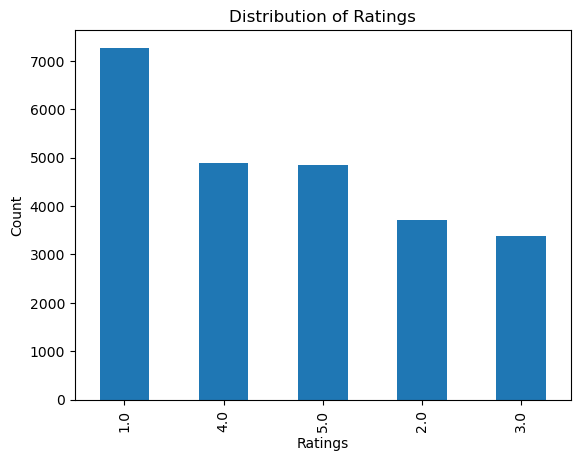

In [ ]:
import matplotlib.pyplot as plt

# Check the distribution of labels
label_counts = df['score'].value_counts()
print(label_counts)

# Plot the distribution of labels
label_counts.plot(kind='bar')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

# 3) Prediction application

    Model that, given a review, predicts number of stars

Purpose of TF-IDF: counting occurrencies of the words (word frequency)
Purpose of word embeddings: encode the semantic meaning of words

Example: “good” and “great” are unrelated in TF-IDF, but very close in word embeddings

We use word embeddings for deep learning models, and we use TF-IDF for simple classical ML models.
So now we don't use word embeddings

> TF-IDF

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert review_cleaned back to strings to apply TF-IDF
df['review_cleaned'] = df['review_cleaned'].apply(lambda x: ' '.join(x))

# Initialize and fit TF-IDF vectorizer
tfidf = TfidfVectorizer()  # Limit features to improve efficiency max_features=5000
tfidf_matrix = tfidf.fit_transform(df['review_cleaned'])

In [105]:
from sklearn.linear_model import LogisticRegression

# Filter the training data (where 'type' == 'train')
train_df = df[df['type'] == 'train']

# Filter the test data (where 'type' == 'test')
test_df = df[df['type'] == 'test']

# Apply TF-IDF transformation to the 'review_cleaned' column for training data
X_train = tfidf.transform(train_df['review_cleaned'])
y_train = train_df['score']

# Apply TF-IDF transformation to the 'review_cleaned' column for test data
X_test = tfidf.transform(test_df['review_cleaned'])
y_test = test_df['score']

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

In [110]:
# EXAMPLE
# Sample review for prediction
sample_review = ["I didn't like the service"]

# Transform the sample review using the TF-IDF vectorizer
sample_review_tfidf = tfidf.transform(sample_review)

# Predict the rating using the trained logistic regression model
predicted_rating = log_reg.predict(sample_review_tfidf)

print(f"Predicted Rating: {predicted_rating[0]}")

Predicted Rating: 3.0
